In [1]:
import copy
import cv2
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from patternutils import *
from sklearn.neighbors import KNeighborsClassifier

# Python Logo

In [2]:
image = read_image('./Images/pythonLogo.jfif')

In [3]:
# the pattern would be impractically large
imageSize = stitched_size(image, verbose = True)

# and have an impractically large number of colors
colorsInImage = count_colors(image, verbose = True)

225 by 225 stitches
18.8 by 18.8 inches at 12 stitches per inch
4118 floss colors


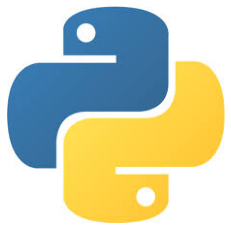

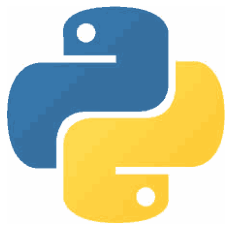

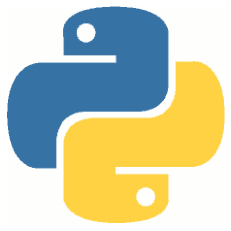

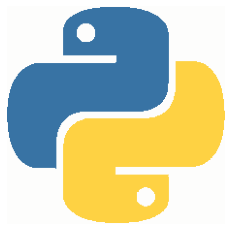

In [4]:
# use k-means clustering to identify and merge similar floss colors
image10 = reduce_colors(image, color_target = 10, attempts = 3)
image05 = reduce_colors(image, color_target = 5, attempts = 3)
image03 = reduce_colors(image, color_target = 3, attempts = 3)

show_image(image)
show_image(image10)
show_image(image05)
show_image(image03)

68 by 68 stitches
5.7 by 5.7 inches at 12 stitches per inch
3 floss colors


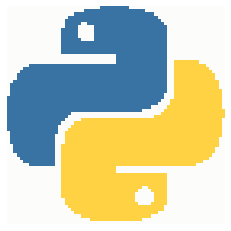

In [5]:
# resize the 3 color image to 1/3 of the original size
image03Small = resize_image(image03, 0.3)

# resizing can involve interpolating colors, so assert 3 colors again
image03Small03 = reduce_colors(image03Small, color_target = 3, attempts = 3)

# check the size of the pattern again
image03SmallSize = stitched_size(image03Small03, verbose = True)
colorsInImage = count_colors(image03Small03, verbose = True)

show_image(image03Small03)

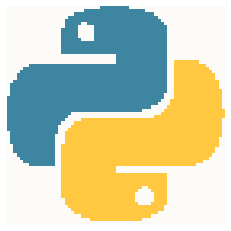

In [6]:
# convert to DMC colors
image03Small03_dmc = convert_to_dmc(image03Small03)

show_image(image03Small03_dmc)

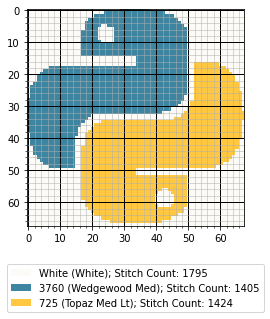

In [7]:
show_image(image03Small03_dmc, as_pattern = True, save_path = './Patterns/pythonLogo.pdf')

# Pacman Ghosts

In [8]:
image = read_image('./Images/pacmanGhosts.jpg')

# the pattern would be impractically large
imageSize = stitched_size(image, verbose = True)

# and have an impractically large number of colors
colorsInImage = count_colors(image, verbose = True)

1920 by 1920 stitches
160.0 by 160.0 inches at 12 stitches per inch
40588 floss colors


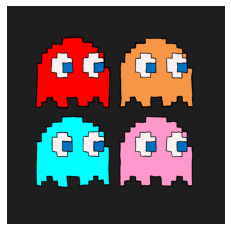

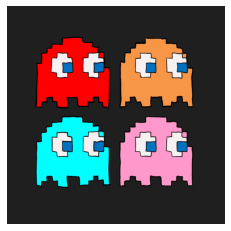

In [9]:
imageRC = reduce_colors(image, color_target = 15, attempts = 3)

show_image(image)
show_image(imageRC)

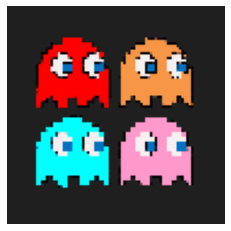

109 floss colors


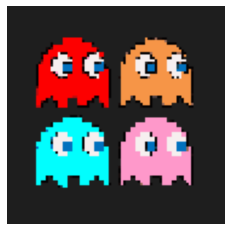

15 floss colors
90 by 90 stitches
7.5 by 7.5 inches at 12 stitches per inch


In [10]:
# resize the few color image to a manageable stitched size
imageRCsmall = resize_image(imageRC, (90, 90))
show_image(imageRCsmall)
colorsInImage = count_colors(imageRCsmall, verbose = True)

# re-assert few colors
imageRCsmallRC = reduce_colors(imageRCsmall, color_target = 15, attempts = 3)
show_image(imageRCsmallRC)
colorsInImage = count_colors(imageRCsmallRC, verbose = True)

# check the size of the pattern again
imageRCsmallRCsize = stitched_size(imageRCsmallRC, verbose = True)

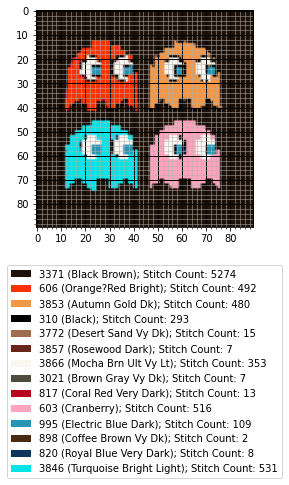

In [11]:
# convert to DMC colors
imageRCsmallRC_dmc = convert_to_dmc(imageRCsmallRC)

show_image(imageRCsmallRC_dmc, as_pattern = True)

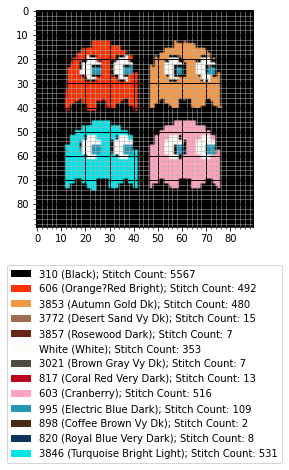

In [12]:
# replace the dark brown background with a true black
imageRCsmallRC_dmc = replace_color(imageRCsmallRC_dmc, '30.17.8', '0.0.0')

# brighter whites for the eyes
imageRCsmallRC_dmc = replace_color(imageRCsmallRC_dmc, '3866', 'White', mode = 'DMC number')

show_image(imageRCsmallRC_dmc, as_pattern = True)

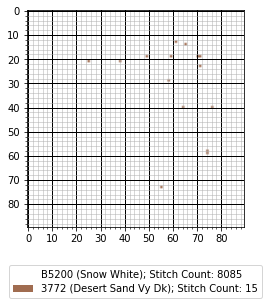

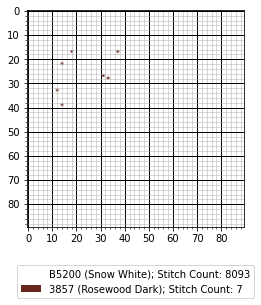

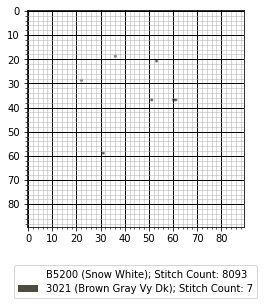

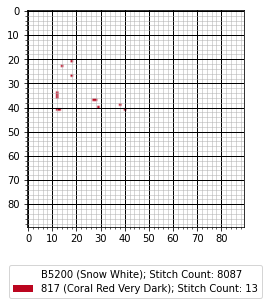

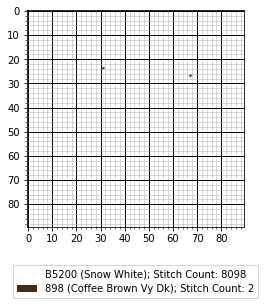

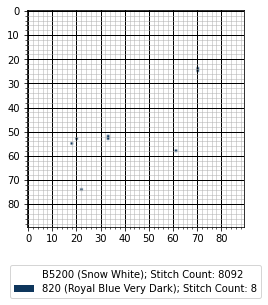

In [13]:
# explore infrequently used colors
colorsInImage = count_colors(imageRCsmallRC_dmc, verbose = False)
for clr in colorsInImage:
    if colorsInImage[clr] < 20:
        temp = highlight_color(imageRCsmallRC_dmc, target = clr, replacement = '255.255.255', mode = 'RGB string')
        show_image(temp, as_pattern = True)

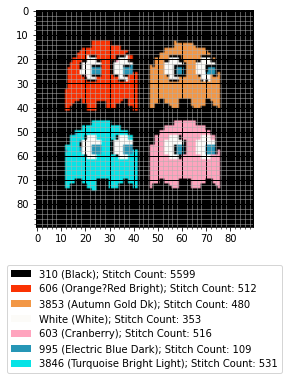

In [14]:
# manually replace infrequently used floss colors

# adjust other black shade that made it in
for lightblack in ['3772', '3021', '898', '820']:
    imageRCsmallRC_dmc = replace_color(imageRCsmallRC_dmc, lightblack, '310', mode = 'DMC number')

# standardize tans
for othertan in []:
    imageRCsmallRC_dmc = replace_color(imageRCsmallRC_dmc, othertan, '3853', mode = 'DMC number')
    
# standardize reds
for otherred in ['3857', '817']:
    imageRCsmallRC_dmc = replace_color(imageRCsmallRC_dmc, otherred, '606', mode = 'DMC number')

show_image(imageRCsmallRC_dmc, as_pattern = True)

In [ ]:
show_image(imageRCsmallRC, as_pattern = True, save_path = './Patterns/pacmanGhosts.pdf')